In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/PFE

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default data type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float32
torch.set_default_tensor_type(FloatTensor)

In [0]:
train_percentage = 0.8
batch_size = 32
ds_name = "PTC_MR"                   

train_loader, valid_loader, info = prep_dataset(ds_name, train_percentage, batch_size)

In [0]:
learning_rate = 0.0001
num_epochs = 1000
n_features = info[0]
hidden_dim = 10
n_classes = info[1]
dropout = 0.01
n_gnn_layers = 6 
n_mlp_layers = 6

In [6]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_log = train_GNN(model, train_loader, valid_loader, optimizer, criterion, num_epochs=num_epochs, device=device)

Epoch [1/1000], Loss: 2.9787, train_acc: 0.0, valid_acc: 0.0
Epoch [2/1000], Loss: 2.9964, train_acc: 17.0, valid_acc: 0.0
Epoch [3/1000], Loss: 2.9198, train_acc: 25.0, valid_acc: 7.0
Epoch [4/1000], Loss: 2.8862, train_acc: 36.0, valid_acc: 42.0
Epoch [5/1000], Loss: 2.8931, train_acc: 44.0, valid_acc: 78.0
Epoch [6/1000], Loss: 2.7896, train_acc: 50.0, valid_acc: 77.0
Epoch [7/1000], Loss: 2.7811, train_acc: 54.0, valid_acc: 79.0
Epoch [8/1000], Loss: 2.7891, train_acc: 57.0, valid_acc: 46.0
Epoch [9/1000], Loss: 2.8160, train_acc: 60.0, valid_acc: 81.0
Epoch [10/1000], Loss: 2.7998, train_acc: 61.0, valid_acc: 82.0
Epoch [11/1000], Loss: 2.7086, train_acc: 63.0, valid_acc: 82.0
Epoch [12/1000], Loss: 2.6756, train_acc: 65.0, valid_acc: 83.0
Epoch [13/1000], Loss: 2.6588, train_acc: 65.0, valid_acc: 84.0
Epoch [14/1000], Loss: 2.6045, train_acc: 66.0, valid_acc: 15.0
Epoch [15/1000], Loss: 2.5970, train_acc: 67.0, valid_acc: 16.0
Epoch [16/1000], Loss: 2.6433, train_acc: 67.0, valid

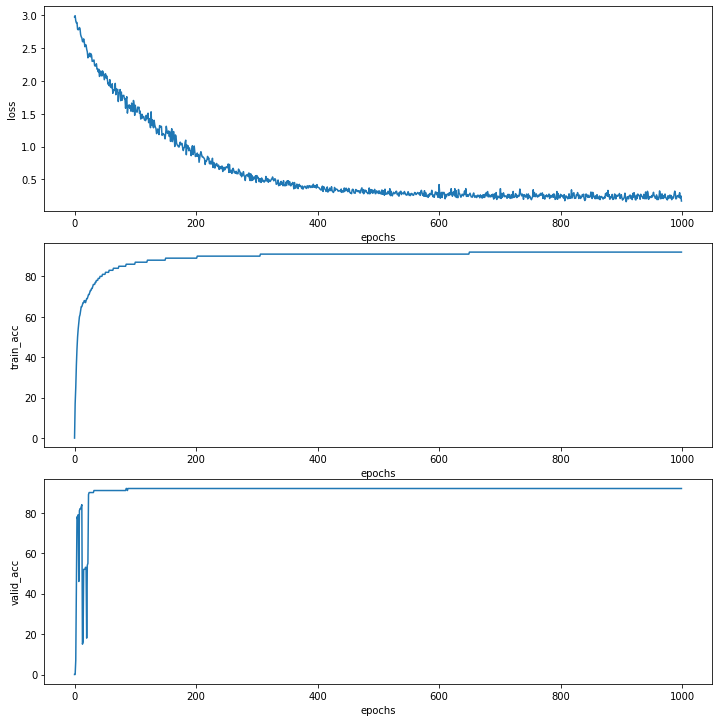

In [7]:
plot_learning_curves(train_log)